# @Users and #Hashtags

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

df = pd.read_csv('tweets_public2.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.columns.tolist()

['airline_sentiment',
 'is_reply',
 'reply_count',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone',
 'newairline_sentiment']

In [32]:
def cleaning(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Remove additional white spaces
    tweet = re.sub('\s+', ' ', tweet)
    #Delete via, rt and by
    tweet = re.sub(r'\b(rt|via|by)\b','',tweet)
    # Remove single characters
    tweet = re.sub(r'\b\w\b','',tweet)
    return tweet

df['text'] = df['text'].apply(cleaning)
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,newairline_sentiment
tweet_id,,,,,,,,,,
942743012337123328,positive,False,0,0,"""los pilotos de ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin,positive
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,positive
936979305720090626,neutral,True,0,0,@iberia me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN,neutral
943983853802328064,negative,True,0,0,"@supermanlopezn @iberia @giroditalia champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada),negative
938207464457211904,negative,True,0,0,@srtafarrelldm @klm @iberia eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada),negative


Extract the users and the hashtags that appear in each tweet and store them in two new columns

In [33]:
def extract_users(tweet):
    users = re.findall(r'@\S\w*',tweet)
    usersnoarrova = [user[1:] for user in users]
    usersnoarrova = '|'.join(usersnoarrova)
    if len(users)==0 : usersnoarrova = np.nan
    return usersnoarrova
df['users'] = df['text'].apply(extract_users)

def extract_hashtags(tweet):
    hashtags = re.findall(r'#\S[^0-9]\w*',tweet)
    nohash = [hashtag[1:] for hashtag in hashtags]
    nohash = '|'.join(nohash)
    if len(hashtags)==0 : nohash = np.nan
    return nohash
df['hashtags'] = df['text'].apply(extract_hashtags)

# Drop data gaps in column 'hastags'
df2 = df.dropna(subset=['hashtags'])
df2.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,newairline_sentiment,users,hashtags
tweet_id,,,,,,,,,,,,
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,positive,iberia|lavecinarubia,rubijarena
932856751099142144,positive,False,0,0,"con @iberia, mi destino un solo click. ¡desea...",NaN,Tue Nov 21 06:22:35 +0000 2017,NaN,NaN,neutral,iberia,holacolombia
937549230994051073,positive,False,0,0,"con @iberia, mi destino un solo click. ¡desea...",NaN,Mon Dec 04 05:08:50 +0000 2017,NaN,Central Time (US & Canada),neutral,iberia,holacolombia
931611760829792256,neutral,False,0,0,"con @iberia, mi destino un solo click. ¡desea...",NaN,Fri Nov 17 19:55:26 +0000 2017,NaN,NaN,neutral,iberia,holaargentina
941121849366368258,positive,False,0,0,"iberia ampliará oferta de asientos méxico, ar...",NaN,Thu Dec 14 01:45:08 +0000 2017,NaN,Mexico City,positive,NaN,turismo|méxico


In [35]:
# Dataframe sentiment vs. hashtag
sentiment_hashtag = df2.set_index('newairline_sentiment').hashtags.str.split(r'|', expand=True).stack().reset_index(level='newairline_sentiment')
sentiment_hashtag.columns = ['newairline_sentiment','hashtag']
# Dataframe hashtag vs. sentiment, where multiple hashtags have 
# replicated sentiments 
df3 = sentiment_hashtag.set_index('hashtag')
# One-hot encoding for airline sentiment
counted = pd.get_dummies(df3['newairline_sentiment'])
histogram = counted.groupby('hashtag').sum()
histogram.tail(4)

,negative,neutral,positive
hashtag,,,
zorionak,0,1,0
ánimo,1,0,0
ñublense,1,0,0
últimosegundo,1,0,0


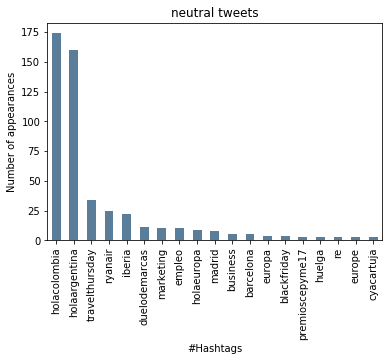

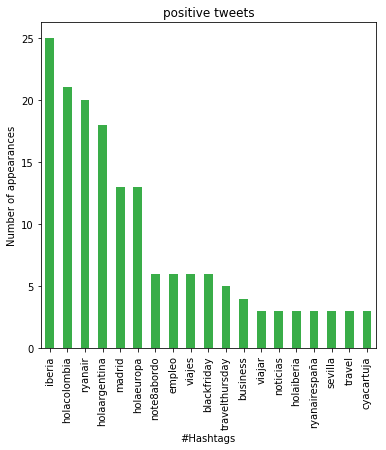

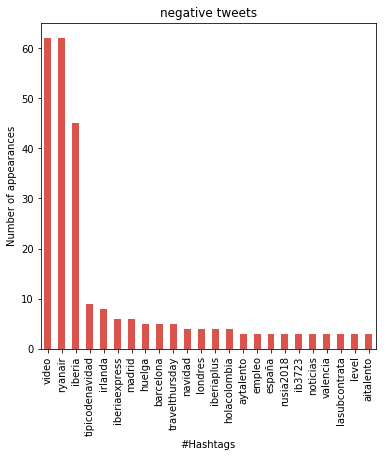

In [36]:
def plot_histo(key):
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 2].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':sns.xkcd_rgb["medium green"],'negative':sns.xkcd_rgb["pale red"],'neutral':sns.xkcd_rgb["steel blue"]}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('#Hashtags')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    plt.show()
    
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    fig.savefig('hashtags'+key+'.jpg', bbox_inches='tight',dpi=300)
    return

keys = ['neutral','positive','negative']
for key in keys:
    plot_histo(key)

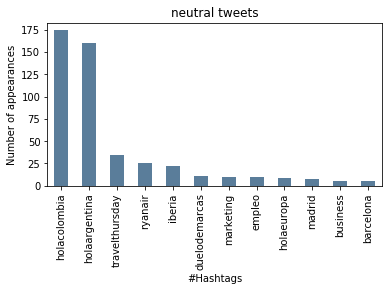

In [39]:
key = 'neutral'
subhisto = histogram[key]
sortlargest = subhisto[histogram[key] > 4].sort_values(ascending=False)
# Plot
barcolor = {'positive':sns.xkcd_rgb["medium green"],'negative':sns.xkcd_rgb["pale red"],'neutral':sns.xkcd_rgb["steel blue"]}
ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
ax.set_ylabel('Number of appearances')
ax.set_xlabel('#Hashtags')
ax.set_xticks(np.arange(len(sortlargest)))
ax.set_xticklabels(sortlargest.index.values, rotation=90)
fig = plt.gcf()
fig.set_size_inches(6,3)
fig.savefig('hashtagsNEUTRAL.jpg', bbox_inches='tight',dpi=300)

In [40]:
### @ Users

In [41]:
# Drop data gaps in column 'users'
df2 = df.dropna(subset=['users'])
# Dataframe sentiment vs. users
sentiment_users = df2.set_index('newairline_sentiment').users.str.split(r'|', expand=True).stack().reset_index(level='newairline_sentiment')
sentiment_users.columns = ['newairline_sentiment','users']
# Dataframe users vs. sentiment, where multiple users have 
# replicated sentiments 
df3 = sentiment_users.set_index('users')
# One-hot encoding for airline sentiment
counted = pd.get_dummies(df3['newairline_sentiment'])
histogram = counted.groupby('users').sum()
histogram.head(4)

,negative,neutral,positive
users,,,
/ryanair,1.0,0.0,0.0
007doctorno,0.0,0.0,1.0
1961_pilar,0.0,0.0,1.0
1976agus,0.0,0.0,1.0


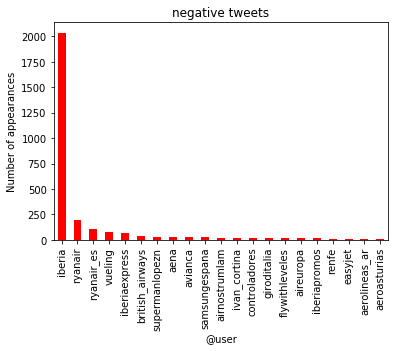

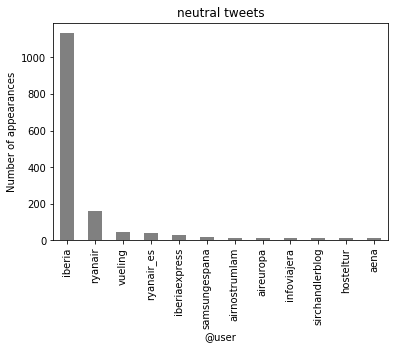

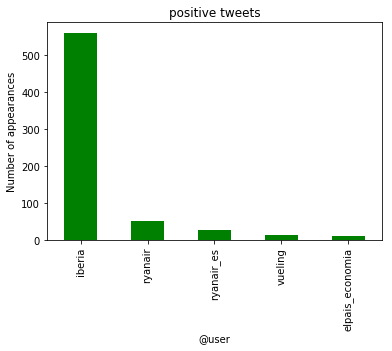

In [42]:
def plot_histo(key):
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 10].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':'g','negative':'r','neutral':'gray'}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('@user')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    plt.show()
    return

keys = ['negative','neutral','positive']
for key in keys:
    plot_histo(key)

Hahstags and users contain mostly airline information. Hahstags like #holacolombia could be advertisment campaings (we could check how many tweets are identical or almost identical)... When did they started? Time evolution of the campaing?

# Most common airlines

In [ ]:
def cleaning(tweet):
    # Remove numbers
    tweet = re.sub(r'\d+','',tweet)
    # Remove punctuation (includes @ and #)
    regex = re.compile('[%s]' % re.escape(string.punctuation+u"¡"+u"¿"+u"€"))
    tweet = re.sub(regex,'',tweet)
    #Remove white spaces
    tweet = re.sub('\s+', '', tweet)
    return tweet

df['cleantext'] = df['text'].apply(cleaning)
df.head()

In [ ]:
def joinstrings(frame):
    onestring = ''.join(frame['cleantext'].str.lower())
    return onestring
all_text = df.groupby('airline_sentiment').apply(joinstrings)
all_text['positive']

We read a list of airlines from https://openflights.org/data.html and neglect those that are listed as non-active nowadays.

In [ ]:
airlines = pd.read_csv('airlines/airlines.dat', encoding='latin-1',index_col='Airline ID',sep=',')
airlines.columns.tolist()
#airlines[3700:4000]

In [ ]:
# Drop non-active airlines
active_airlines = airlines.drop(airlines.index[(airlines.Active == 'N')])
# Drop airlines with missing data
active_airlines = active_airlines.dropna()
# Save list of active complete airlines
airlines_list = active_airlines['Name'].str.lower()
#Remove white spaces
airlines_list= [re.sub('\s+', '',a) for a in airlines_list]

In [ ]:
#airlines_list = airlines_list.tolist()
print(airlines_list[20:30])

In [ ]:
import re

def extract_popular_airlines(frame):
    keys = ['positive','negative','neutral']

    for key in keys:
        occ = dict()
        for airline in airlines_list:
            counts = len(re.findall(airline,all_text[key]))
            print (airline, counts)
            if(counts > 0): occ[airline] = counts
        print(key)
        print(occ.keys())
        return occ
#        for w in sorted(occ, key=occ.get, reverse=True):

airlines_in_tweets = all_text.apply(extract_popular_airlines)

In [ ]:
allnames = list(airlines_in_tweets['positive'].keys())+list(airlines_in_tweets['negative'].keys())+list(airlines_in_tweets['neutral'])
#print(allnames)
sorted(list(set(allnames)))

In [ ]:
print(list(airlines_in_tweets['neutral']))